In [1]:
from lagrangian_trajectory_clustering.metrics import (
    lcs_numpy,
    lcs_numpy_numba,
    lcs_pure,
    lcs_pure_numba,
    levenshtein_numpy,
    levenshtein_numpy_numba,
)

In [2]:
from string import ascii_uppercase
import random

n = 5
x = "".join(random.choice(ascii_uppercase) for n in range(n))
y = "".join(random.choice(ascii_uppercase) for n in range(n))

In [3]:
print(x)
print(y)

PHTML
NIETY


In [4]:
# call once for triggering compilation
lcs_numpy_numba(x, y);
lcs_pure_numba(x, y);
levenshtein_numpy_numba(x, y);

In [5]:
%timeit lcs_numpy(x, y);
%timeit lcs_numpy_numba(x, y);
%timeit lcs_pure(x, y);
%timeit lcs_pure_numba(x, y);
%timeit levenshtein_numpy(x, y);
%timeit levenshtein_numpy_numba(x, y);

25.8 µs ± 297 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
9.69 µs ± 117 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
12.3 µs ± 87 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
11.2 µs ± 78.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
52.9 µs ± 449 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
9.82 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [6]:
import pandas as pd

In [7]:
lengths = [2 ** n for n in range(10)]
print(lengths)
times_numba = []
times = []
for n in lengths:
    x = "".join(random.choice(ascii_uppercase) for n in range(n))
    y = "".join(random.choice(ascii_uppercase) for n in range(n))
    tt = %timeit -o lcs_pure_numba(x, y);
    times_numba.append(tt.average)
    tt = %timeit -o lcs_pure(x, y);
    times.append(tt.average)
results = pd.DataFrame({"sequence_length": lengths, "time_numba": times_numba, "time": times})

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
6.55 µs ± 64.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.59 µs ± 27 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
7.33 µs ± 195 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
3.03 µs ± 27.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
9.56 µs ± 47.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
8.17 µs ± 46.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
17.8 µs ± 60.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
28 µs ± 520 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
51.3 µs ± 204 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
101 µs ± 509 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
180 µs ± 800 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
391 µs ± 4.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
690 µs ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loop

<AxesSubplot:xlabel='sequence_length', ylabel='time_numba'>

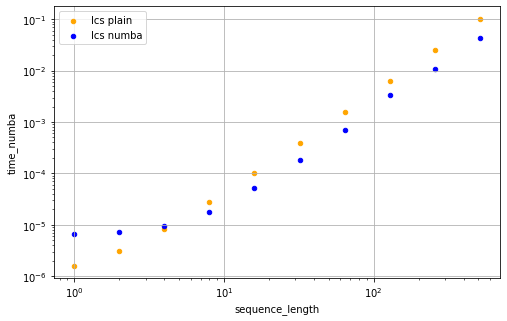

In [8]:
ax = results.plot.scatter(x="sequence_length", y="time", loglog=True, color="orange", grid=True, figsize=(8, 5), label="lcs plain")
results.plot.scatter(x="sequence_length", y="time_numba", loglog=True, color="blue", label="lcs numba", ax=ax, grid=True)

<AxesSubplot:xlabel='sequence_length', ylabel='time_numba'>

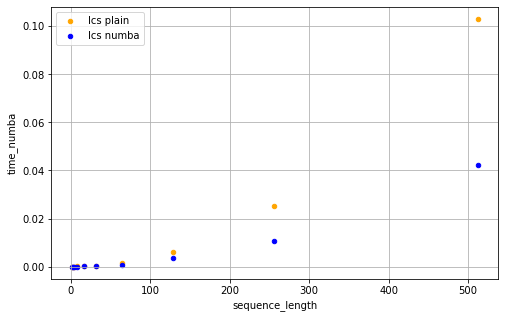

In [10]:
ax = results.plot.scatter(x="sequence_length", y="time", color="orange", grid=True, figsize=(8, 5), label="lcs plain")
results.plot.scatter(x="sequence_length", y="time_numba", color="blue", label="lcs numba", ax=ax, grid=True)

In [29]:
# minute threshold
n_minute = results.set_index("sequence_length").apply(lambda t: 60.0 / t) ** 0.5
n_hour = results.set_index("sequence_length").apply(lambda t: 3600.0 / t) ** 0.5
n_day = results.set_index("sequence_length").apply(lambda t: 24.0 * 3600.0 / t) ** 0.5

<AxesSubplot:title={'center':'max num trajs for runtime of one minute'}, xlabel='sequence_length'>

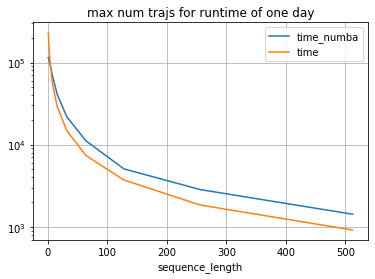

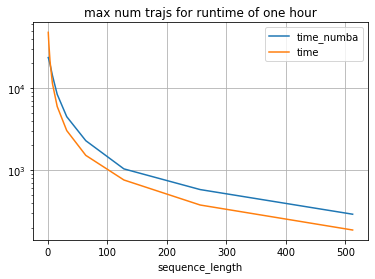

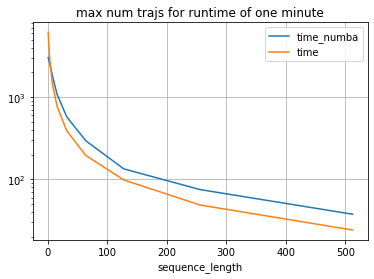

In [30]:
n_day.plot(logy=True, grid=True, title="max num trajs for runtime of one day")
n_hour.plot(logy=True, grid=True, title="max num trajs for runtime of one hour")
n_minute.plot(logy=True, grid=True, title="max num trajs for runtime of one minute")